## **CMSC 320 Final Project Checkpoint 2**
*Vicky Mai and Andrew Kim*



Database: 10/2023 Branded Foods Database at https://fdc.nal.usda.gov/download-datasets.html

Helpful Database Info: https://fdc.nal.usda.gov/portal-data/external/dataDictionary

*Initial Setup, Impressions & Cleaning*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_366801/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Data Preprocessing



> First looking at branded_food.csv:



In [2]:
brand_df = pd.read_csv("branded_food.csv")
brand_df.head(10)

/tmp/ipykernel_366801/3305590184.py:1: DtypeWarning: Columns (2,3,4,6,9,12,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  brand_df = pd.read_csv("branded_food.csv")


,fdc_id,brand_owner,brand_name,subbrand_name,gtin_upc,ingredients,not_a_significant_source_of,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,data_source,package_weight,modified_date,available_date,market_country,discontinued_date,preparation_state_code,trade_channel,short_description
0,1105904,Richardson Oilseed Products (US) Limited,NaN,NaN,27000612323,Vegetable Oil,NaN,15.0,ml,NaN,Oils Edible,GDSN,NaN,2020-10-02,2020-11-13,United States,NaN,NaN,NaN,NaN
1,1105905,CAMPBELL SOUP COMPANY,NaN,NaN,51000198808,"INGREDIENTS: BEEF STOCK, CONTAINS LESS THAN 2%...",NaN,240.0,ml,NaN,Herbs/Spices/Extracts,GDSN,NaN,2020-09-12,2020-11-13,United States,NaN,NaN,NaN,NaN
2,1105906,CAMPBELL SOUP COMPANY,NaN,NaN,51000213273,"INGREDIENTS: CLAM STOCK, POTATOES, CLAMS, CREA...",NaN,440.0,g,NaN,Prepared Soups,GDSN,NaN,2020-09-01,2020-11-13,United States,NaN,NaN,NaN,NaN
3,1105907,CAMPBELL SOUP COMPANY,NaN,NaN,51000213303,"INGREDIENTS: WATER, CREAM, BROCCOLI, CELERY, V...",NaN,440.0,g,NaN,Prepared Soups,GDSN,NaN,2020-09-01,2020-11-13,United States,NaN,NaN,NaN,NaN
4,1105908,CAMPBELL SOUP COMPANY,NaN,NaN,51000224637,"INGREDIENTS: CHICKEN STOCK, CONTAINS LESS THAN...",NaN,240.0,ml,NaN,Herbs/Spices/Extracts,GDSN,NaN,2020-10-03,2020-11-13,United States,NaN,NaN,NaN,NaN
5,1105909,CAMPBELL SOUP COMPANY,NaN,NaN,51000227492,"INGREDIENTS: WATER, PEA BEANS, CARROTS, COOKED...",NaN,412.0,g,NaN,Prepared Soups,GDSN,NaN,2020-09-01,2020-11-13,United States,NaN,NaN,NaN,NaN
6,1105910,CAMPBELL SOUP COMPANY,NaN,NaN,51000024213,"INGREDIENTS: BEEF STOCK, CONTAINS LESS THAN 2%...",NaN,411.0,g,NaN,Herbs/Spices/Extracts,GDSN,NaN,2020-10-03,2020-11-13,United States,NaN,NaN,NaN,NaN
7,1105911,CAMPBELL SOUP COMPANY,NaN,NaN,51000227478,"INGREDIENTS: DICED TOMATOES IN TOMATO JUICE, T...",NaN,120.0,ml,NaN,Sauces/Spreads/Dips/Condiments,GDSN,NaN,2020-09-01,2020-11-13,United States,NaN,NaN,NaN,NaN
8,1105912,CAMPBELL SOUP COMPANY,NaN,NaN,51000058874,"INGREDIENTS: TOMATO PUREE (WATER, TOMATO PASTE...",NaN,120.0,ml,NaN,Prepared Soups,GDSN,NaN,2020-09-01,2020-11-13,United States,NaN,NaN,NaN,NaN
9,1105913,CAMPBELL SOUP COMPANY,NaN,NaN,51000232847,"INGREDIENTS: WATER, TOMATO PUREE (WATER, TOMAT...",NaN,443.0,g,NaN,Dough Based Products / Meals,GDSN,NaN,2020-09-26,2020-11-13,United States,NaN,NaN,NaN,NaN


> We see that there are multiple columns of which the first 10 rows have no information: not_a_significant_source_of, household_serving_fulltext, package_weight, discontinued_date, preparation_state_code, trade_channel, and short_description. In order to determine if these columns would be useful for us in our analysis, we can find how many rows have these attributes filled in.

In [3]:
brand_df.count()

fdc_id                         1947155
brand_owner                    1930265
brand_name                     1399308
subbrand_name                   101803
gtin_upc                       1947155
ingredients                    1941762
not_a_significant_source_of      78611
serving_size                   1936375
serving_size_unit              1928127
household_serving_fulltext      860080
branded_food_category          1936547
data_source                    1947155
package_weight                  803946
modified_date                  1947135
available_date                 1947155
market_country                 1947155
discontinued_date                    0
preparation_state_code           49703
trade_channel                    21184
short_description                49818
dtype: int64

> Since over 90% of our data has missing attributes for not_a_significant_source_of, discontinued_date, preparation_state_code, trade_channel, and short_description, and we are not interested in this info, we decided to drop these columns. Although subbrand_name is also uncommon, we decided to keep it to distinguish items that fall under the same brand, but different subbrands.

In [4]:
brand_df = brand_df.drop(["not_a_significant_source_of", "discontinued_date", "preparation_state_code", "trade_channel", "short_description"], axis=1)
brand_df.head()

,fdc_id,brand_owner,brand_name,subbrand_name,gtin_upc,ingredients,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,data_source,package_weight,modified_date,available_date,market_country
0,1105904,Richardson Oilseed Products (US) Limited,NaN,NaN,27000612323,Vegetable Oil,15.0,ml,NaN,Oils Edible,GDSN,NaN,2020-10-02,2020-11-13,United States
1,1105905,CAMPBELL SOUP COMPANY,NaN,NaN,51000198808,"INGREDIENTS: BEEF STOCK, CONTAINS LESS THAN 2%...",240.0,ml,NaN,Herbs/Spices/Extracts,GDSN,NaN,2020-09-12,2020-11-13,United States
2,1105906,CAMPBELL SOUP COMPANY,NaN,NaN,51000213273,"INGREDIENTS: CLAM STOCK, POTATOES, CLAMS, CREA...",440.0,g,NaN,Prepared Soups,GDSN,NaN,2020-09-01,2020-11-13,United States
3,1105907,CAMPBELL SOUP COMPANY,NaN,NaN,51000213303,"INGREDIENTS: WATER, CREAM, BROCCOLI, CELERY, V...",440.0,g,NaN,Prepared Soups,GDSN,NaN,2020-09-01,2020-11-13,United States
4,1105908,CAMPBELL SOUP COMPANY,NaN,NaN,51000224637,"INGREDIENTS: CHICKEN STOCK, CONTAINS LESS THAN...",240.0,ml,NaN,Herbs/Spices/Extracts,GDSN,NaN,2020-10-03,2020-11-13,United States


> We also noticed that we have 1947155 foods by fdc_id, but only 1930265 brand_owner attributes. In order to ensure all foods can be identified by a brand when we make our conclusions, since we may form conclusions about brands, we check if these unknown/missing brand owner foods have brand names.

In [5]:
no_owners = brand_df[brand_df["brand_owner"].isnull() & ~brand_df['brand_name'].isnull()]['brand_name']
no_owners

1232612               SILVER SPRING
1812860                     SUZIE'S
1812861                RITTER SPORT
1812862                 LUCKY FOODS
1812863                     NUTELLA
                     ...           
1945422               MARKET PANTRY
1945423               MARKET PANTRY
1945424    SNOWDONIA CHEESE COMPANY
1945425    SNOWDONIA CHEESE COMPANY
1945711                ARCHER FARMS
Name: brand_name, Length: 15021, dtype: object

> Great, a lot do. Dropping ones that don't:

In [6]:
brand_df = brand_df.dropna(subset=['brand_owner', 'brand_name'], how='all')

> Next we want to load in food_csv
  <br>Note: This contains the specific food names (i.e. with fdc_ids 1234 and 1235, "FakeBrand's Good Soup Clam Chowder" and "FakeBrand's Good Soup Chicken Soup" descriptors come from the same brand owner "FakeBrand", brand name "FakeBrand's Good Soup" in branded_foods)



In [7]:
food_df = pd.read_csv("food.csv")
food_df.head(10)

/tmp/ipykernel_366801/3245621894.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  food_df = pd.read_csv("food.csv")


,fdc_id,data_type,description,food_category_id,publication_date,market_country,trade_channel,microbe_data
0,1105904,branded_food,WESSON Vegetable Oil 1 GAL,NaN,2020-11-13,United States,NaN,"[{""min_value"":null,""uom"":null,""microbe_method""..."
1,1105905,branded_food,SWANSON BROTH BEEF,NaN,2020-11-13,United States,NaN,"[{""min_value"":null,""uom"":null,""microbe_method""..."
2,1105906,branded_food,CAMPBELL'S SLOW KETTLE SOUP CLAM CHOWDER,NaN,2020-11-13,United States,NaN,"[{""min_value"":null,""uom"":null,""microbe_method""..."
3,1105907,branded_food,CAMPBELL'S SLOW KETTLE SOUP CHEESE BROCCOLI,NaN,2020-11-13,United States,NaN,"[{""min_value"":null,""uom"":null,""microbe_method""..."
4,1105908,branded_food,SWANSON BROTH CHICKEN,NaN,2020-11-13,United States,NaN,"[{""min_value"":null,""uom"":null,""microbe_method""..."
5,1105909,branded_food,CAMPBELL'S SOUP BEAN AND HAM,NaN,2020-11-13,United States,NaN,"[{""min_value"":null,""uom"":null,""microbe_method""..."
6,1105910,branded_food,SWANSON BROTH BEEF,NaN,2020-11-13,United States,NaN,"[{""min_value"":null,""uom"":null,""microbe_method""..."
7,1105911,branded_food,PREGO SAUCES TOMATO BASIL,NaN,2020-11-13,United States,NaN,"[{""min_value"":null,""uom"":null,""microbe_method""..."
8,1105912,branded_food,CAMPBELL'S SOUP TOMATO,NaN,2020-11-13,United States,NaN,"[{""min_value"":null,""uom"":null,""microbe_method""..."
9,1105913,branded_food,CAMPBELL'S PASTA SPAGHETTIOS W FRANKS,NaN,2020-11-13,United States,NaN,"[{""min_value"":null,""uom"":null,""microbe_method""..."


> We only are interested in food names from the description column. Thus to make it easier on us, let's set a new dataframe by attributing item names to brands:

In [8]:
brand_df.insert(2, "name", food_df[food_df['fdc_id'].isin(brand_df['fdc_id'])]['description'])
branded_df = brand_df
brand_df

,fdc_id,brand_owner,name,brand_name,subbrand_name,gtin_upc,ingredients,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,data_source,package_weight,modified_date,available_date,market_country
0,1105904,Richardson Oilseed Products (US) Limited,WESSON Vegetable Oil 1 GAL,NaN,NaN,27000612323,Vegetable Oil,15.0,ml,NaN,Oils Edible,GDSN,NaN,2020-10-02,2020-11-13,United States
1,1105905,CAMPBELL SOUP COMPANY,SWANSON BROTH BEEF,NaN,NaN,51000198808,"INGREDIENTS: BEEF STOCK, CONTAINS LESS THAN 2%...",240.0,ml,NaN,Herbs/Spices/Extracts,GDSN,NaN,2020-09-12,2020-11-13,United States
2,1105906,CAMPBELL SOUP COMPANY,CAMPBELL'S SLOW KETTLE SOUP CLAM CHOWDER,NaN,NaN,51000213273,"INGREDIENTS: CLAM STOCK, POTATOES, CLAMS, CREA...",440.0,g,NaN,Prepared Soups,GDSN,NaN,2020-09-01,2020-11-13,United States
3,1105907,CAMPBELL SOUP COMPANY,CAMPBELL'S SLOW KETTLE SOUP CHEESE BROCCOLI,NaN,NaN,51000213303,"INGREDIENTS: WATER, CREAM, BROCCOLI, CELERY, V...",440.0,g,NaN,Prepared Soups,GDSN,NaN,2020-09-01,2020-11-13,United States
4,1105908,CAMPBELL SOUP COMPANY,SWANSON BROTH CHICKEN,NaN,NaN,51000224637,"INGREDIENTS: CHICKEN STOCK, CONTAINS LESS THAN...",240.0,ml,NaN,Herbs/Spices/Extracts,GDSN,NaN,2020-10-03,2020-11-13,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947150,2662264,Target Stores,"SHARP CHEDDAR REDUCED FAT SHREDDED CHEESE, SHA...",MARKET PANTRY,NaN,85239112977,REDUCED FAT CHEDDAR CHEESE (PASTEURIZED PART-S...,28.0,GRM,0.25 cup,Cheese,LI,8 oz/226 g,2023-09-01,2023-10-26,United States
1947151,2662265,Target Stores,"HAVARTI DELI SLICED CHEESE, HAVARTI",MARKET PANTRY,NaN,85239113011,"PASTEURIZED MILK, SALT, CHEESE CULTURE, ENZYMES.",20.0,GRM,1 SLICE,Cheese,LI,7 oz/198 g,2023-09-08,2023-10-26,United States
1947152,2662266,Target Stores,COLBY JACK A BLEND OF COLBY & MONTEREY JACK CH...,MARKET PANTRY,NaN,85239113059,"PASTEURIZED MILK, CHEESE CULTURES, SALT, ENZYM...",24.0,GRM,1 PIECE,Cheese,LI,20 oz/567 g,2023-08-31,2023-10-26,United States
1947153,2662267,Target Stores,"EXTRA BUTTER MICROWAVE POPCORN, EXTRA BUTTER",MARKET PANTRY,NaN,85239113493,"POPCORN, PALM OIL, SALT, NATURAL AND ARTIFICIA...",30.0,GRM,NaN,"Popcorn, Peanuts, Seeds & Related Snacks",LI,64.8 oz/1.84 kg,2023-09-01,2023-10-26,United States


# Basic Data Exploration and Summary Statistics

## 1. Boxplots of Serving Sizes by Branded Food Category

We're going to plot 1/4 of the Branded Food Category Column by Serving Size, and plot them as boxplots.

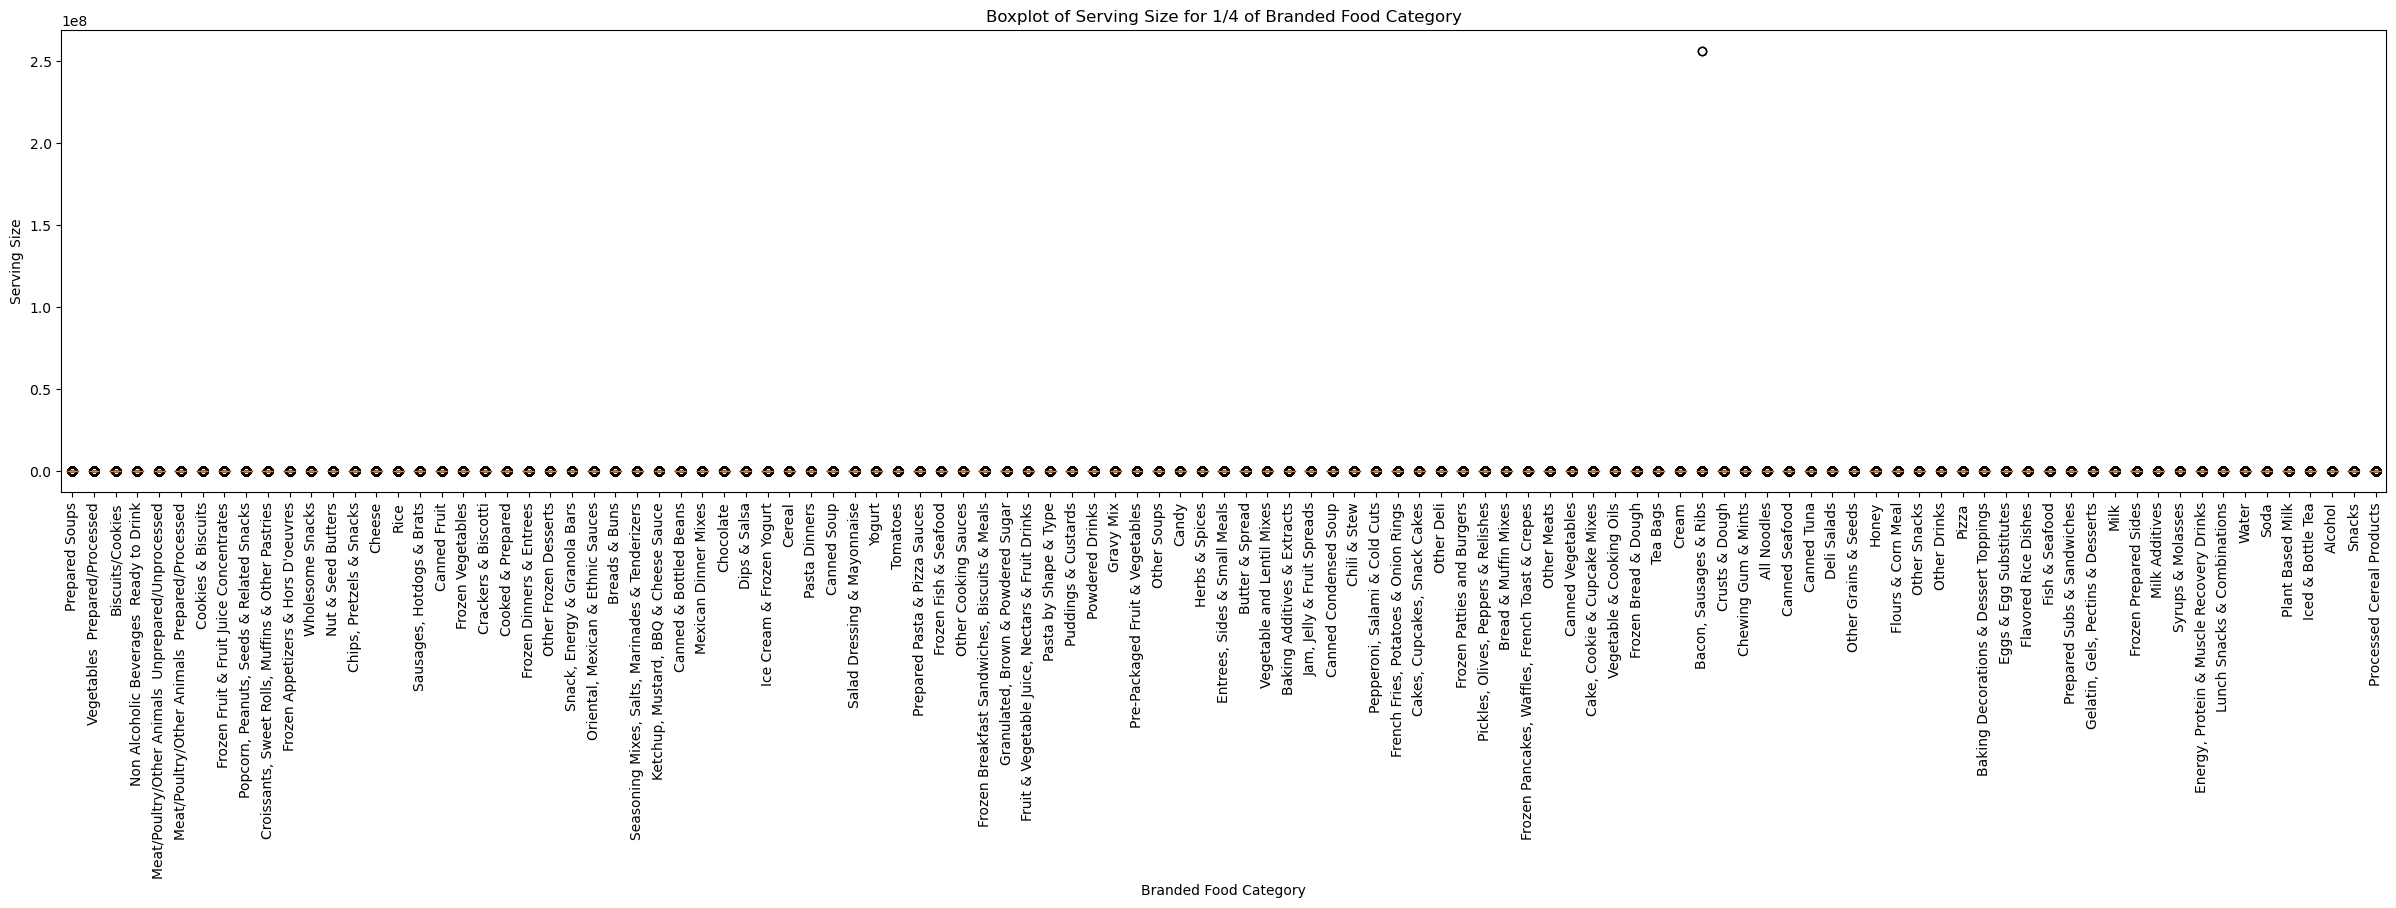

In [9]:
# Ensure serving_size is a numeric type for plotting
brand_df['serving_size'] = pd.to_numeric(brand_df['serving_size'], errors='coerce')

# Remove rows where serving_size or branded_food_category is NaN
dropped_df = brand_df.dropna(subset=['serving_size', 'branded_food_category'])

category_counts= dropped_df['branded_food_category'].value_counts()
top_categories = category_counts.head(int(len(category_counts) * .25)).index
quarter_df = dropped_df[dropped_df['branded_food_category'].isin(top_categories)]

# Creating the boxplot
plt.figure(figsize=(30,6))
plt.xticks(rotation=90)
plt.title('Boxplot of Serving Size for 1/4 of Branded Food Category')
plt.xlabel('Branded Food Category')
plt.ylabel('Serving Size')

# Here, adjust the 'whis' parameter as needed to control the reach of the whiskers (default 1.5 IQR)
plt.boxplot([group['serving_size'].values for name, group in quarter_df.groupby('branded_food_category')],
            labels=quarter_df['branded_food_category'].unique(), whis=[5, 95])

plt.show()

We've snuffed out a ridiculous outlier that's making our plots skewed. Let's fix that: 

/tmp/ipykernel_366801/3091777096.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_df = quarter_df.groupby('branded_food_category').apply(lambda x: remove_outliers(x, 'serving_size')).reset_index(drop=True)


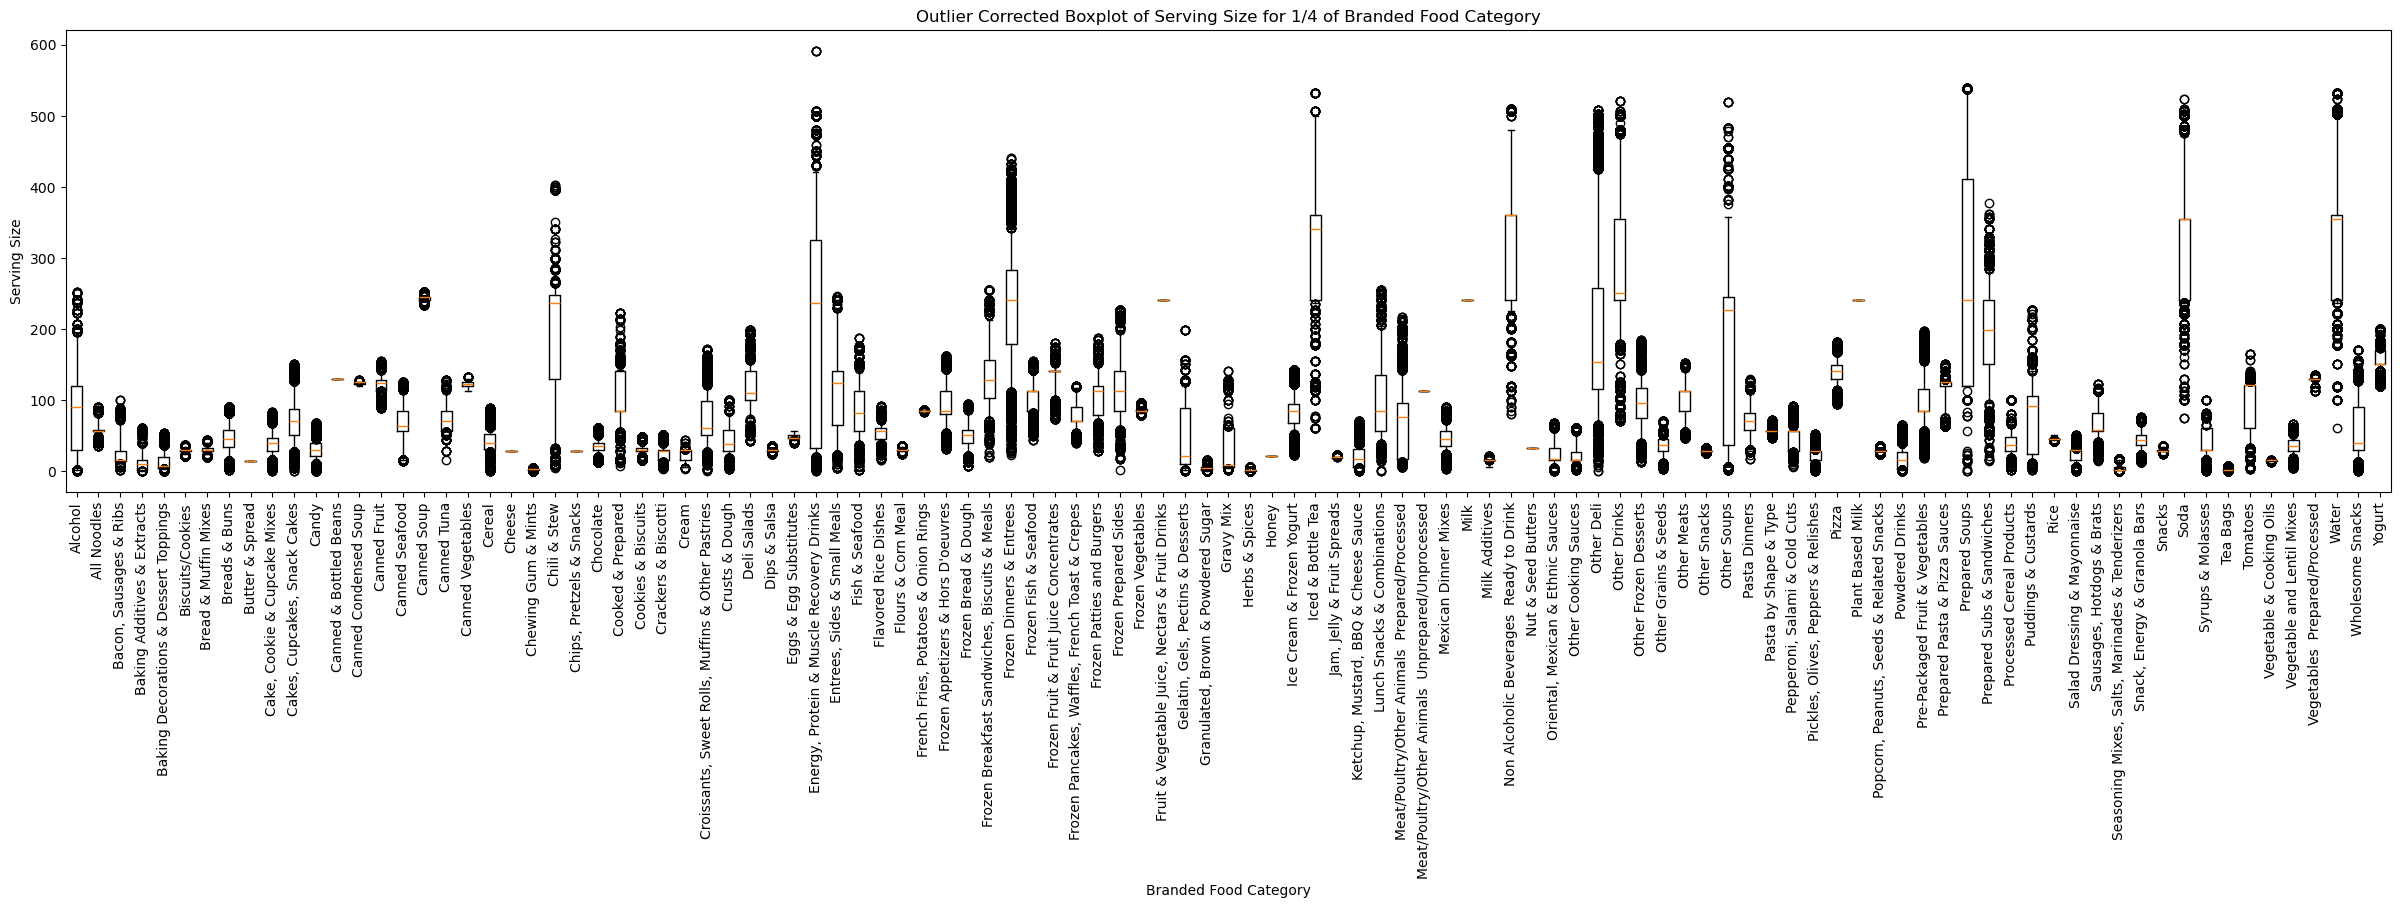

In [10]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

filtered_df = quarter_df.groupby('branded_food_category').apply(lambda x: remove_outliers(x, 'serving_size')).reset_index(drop=True)

# Creating the boxplot
plt.figure(figsize=(30,6))
plt.xticks(rotation=90)
plt.title('Outlier Corrected Boxplot of Serving Size for 1/4 of Branded Food Category')
plt.xlabel('Branded Food Category')
plt.ylabel('Serving Size')

# Here, adjust the 'whis' parameter as needed to control the reach of the whiskers (default 1.5 IQR)
plt.boxplot([group['serving_size'].values for name, group in filtered_df.groupby('branded_food_category')],
            labels=filtered_df['branded_food_category'].unique(), whis=[5, 95])

plt.show()

We're also going to create a list of tuples in this format: [('category name', mean)]. 

In [11]:
category_means = dropped_df.groupby('branded_food_category')['serving_size'].mean()

# Create a list of tuples
means_list = list(category_means.items())

# Printing the list
print(means_list)
len(means_list)

[('Alcohol', 96.10054892800588), ('Alcoholic Beverages', 100.0), ('All Noodles', 74.31217309023957), ('Amino Acid Supplements', 27.5), ('Antioxidant Supplements', 42.25), ('Antipasto', 25.0), ('Aquatic Invertebrates/Fish/Shellfish/Seafood Combination', 124.6), ('Ayurvedic Supplements', 360.0), ('Baby/Infant  Foods/Beverages', 174.24861878453038), ('Baby/Infant – Foods/Beverages', 156.625), ('Bacon', 86.53846153846153), ('Bacon, Sausages & Ribs', 33.164709380110004), ('Baking', 6.435566037825818), ('Baking Accessories', 8.093939422838616), ('Baking Additives & Extracts', 20.00310437132169), ('Baking Decorations & Dessert Toppings', 15.28948105482905), ('Baking Needs', 36.12692307508909), ('Baking/Cooking Mixes (Frozen)', 59.0), ('Baking/Cooking Mixes (Perishable)', 42.0), ('Baking/Cooking Mixes (Shelf Stable)', 43.12328767123287), ('Baking/Cooking Mixes/Supplies', 47.520049930480525), ('Baking/Cooking Mixes/Supplies Variety Packs', 30.0), ('Baking/Cooking Supplies (Shelf Stable)', 26.35

428

## Geographical Analysis of Products

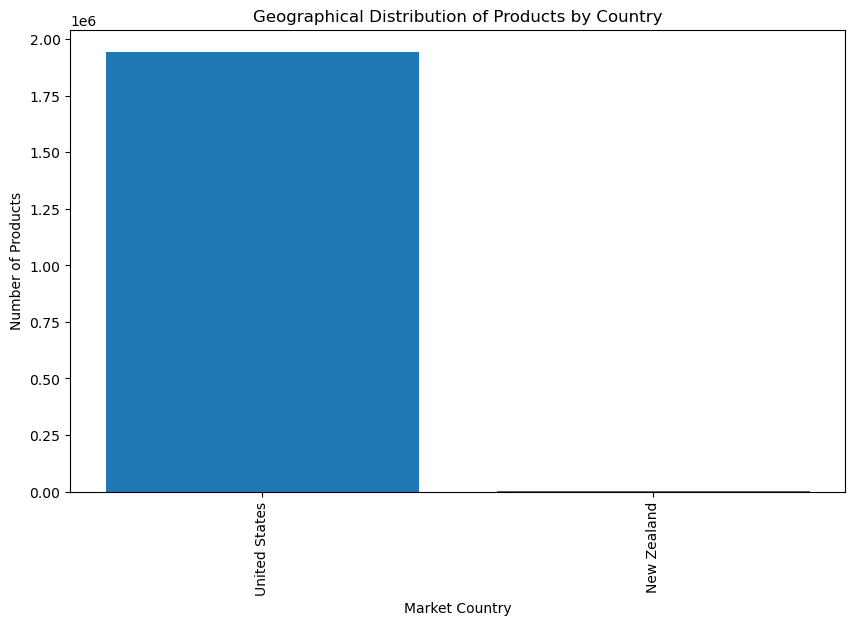

In [13]:
country_counts = brand_df['market_country'].value_counts()

# Creating the bar chart
plt.figure(figsize=(10,6))
plt.bar(country_counts.index, country_counts.values)
plt.xticks(rotation=90)
plt.title('Geographical Distribution of Products by Country')
plt.xlabel('Market Country')
plt.ylabel('Number of Products')

plt.show()

From the above bar chart, we can see that the products are mostly all for the United States. This makes sense because this data is compiled by the U.S. Department of Agriculture. Just to check, we'll see how many are from New Zealand compared to the U.S.

In [15]:
brand_df['market_country'].value_counts()
1117/1944169

0.0005745385303438127

So 99.9426% of the products in this dataset are from the U.S. 

## 3. Correlation Between Package Weight and Serving Size

57


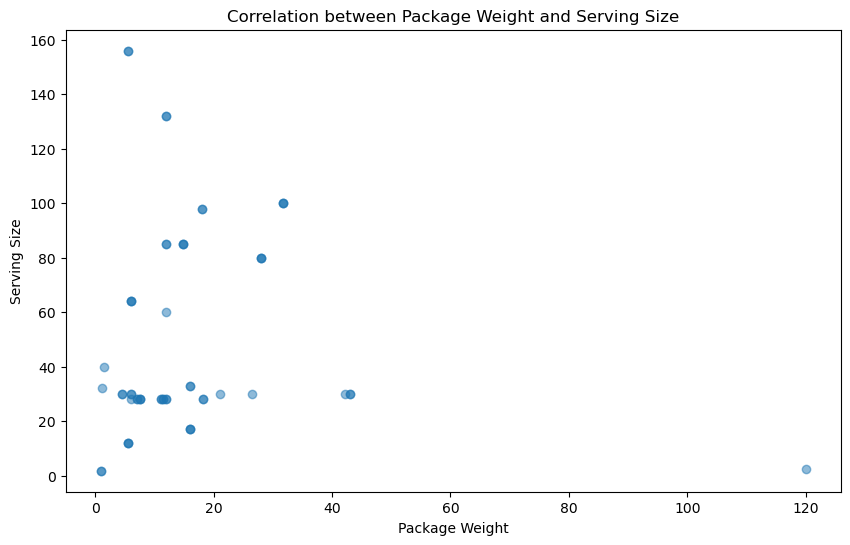

In [20]:
brand_df['package_weight'] = pd.to_numeric(brand_df['package_weight'], errors='coerce')
brand_df['serving_size'] = pd.to_numeric(brand_df['serving_size'], errors='coerce')

# Drop rows where either package_weight or serving_size is NaN
df_cleaned = brand_df.dropna(subset=['package_weight', 'serving_size'])
print(len(df_cleaned))
# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['package_weight'], df_cleaned['serving_size'], alpha=0.5)
plt.title('Correlation between Package Weight and Serving Size')
plt.xlabel('Package Weight')
plt.ylabel('Serving Size')

# Show the plot
plt.show()

Seeing from the length of df_cleaned, we can see that since so much of the data is missing from the package_weight column, there aren't much data available for us to plot. Even from the data we have, we can see there isn't much of a correlation. 

## 4. Hypothesis Testing for Serving Size and Branded Food Category

For our hypothesis test, we'll use serving size and branded food category. \
H0: The mean serving size of 'Wrapped Snacks - Muesli Bars' is equal to the mean serving size of 'Wrapped Snacks - Nut Bars'\
Ha: The mean serving size of 'Wrapped Snacks - Muesli Bars' is not equal to the mean serving size of 'Wrapped Snacks - Nut Bars'

In [23]:
from scipy.stats import ttest_ind

brand_df['serving_size'] = pd.to_numeric(brand_df['serving_size'], errors='coerce')
df = brand_df.dropna(subset=['serving_size'])

muesli_bars = df[df['branded_food_category'] == 'Wrapped Snacks - Muesli Bars']['serving_size']
nut_bars = df[df['branded_food_category'] == 'Wrapped Snacks - Nut Bars']['serving_size']

t_stat, p_value = ttest_ind(muesli_bars, nut_bars, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in serving sizes.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in serving sizes.")

T-statistic: -0.05716422116801146
P-value: 0.9559654603065515
Fail to reject the null hypothesis: There is no significant difference in serving sizes.
